In [1]:
import random
import numpy as np
import tensorflow as tf
import mlflow.keras
import pandas as pd

from ml_investing_wne import config
from ml_investing_wne.utils import get_logger
from ml_investing_wne.experiment_factory import create_asset, experiment_factory

random.seed(config.seed)
np.random.seed(config.seed)
tf.random.set_seed(config.seed)

In [2]:
print(config.currency)
print(config.freq) 
asset = create_asset()
experiment= experiment_factory(asset).get_experiment()

BTCUSDT
1min


In [3]:
print(config.fixed_barrier)
print(config.RUN_SUBTYPE)

0.05
cumsum_triple_barrier


In [4]:
# change all column types to numeric
experiment.df = experiment.df.apply(pd.to_numeric, errors='ignore')
experiment.df.dtypes

open             float64
close            float64
high             float64
low              float64
volume           float64
y_pred             int64
to_keep            int64
SMA_5            float64
EMA_5            float64
VAR_5            float64
SMA_10           float64
EMA_10           float64
VAR_10           float64
SMA_15           float64
EMA_15           float64
VAR_15           float64
SMA_20           float64
EMA_20           float64
VAR_20           float64
SMA_50           float64
EMA_50           float64
VAR_50           float64
MACD_12_26_9     float64
MACDh_12_26_9    float64
MACDs_12_26_9    float64
RSI_14           float64
RSI_10           float64
RSI_6            float64
STOCHk_14_3_3    float64
STOCHd_14_3_3    float64
WILLR_14         float64
BBL_5_2.0        float64
BBM_5_2.0        float64
BBU_5_2.0        float64
BBB_5_2.0        float64
BBP_5_2.0        float64
roc_1            float64
hour               int64
weekday            int64
hour_sin         float64


In [5]:
experiment.df.head(2)

,open,close,high,low,volume,y_pred,to_keep,SMA_5,EMA_5,VAR_5,...,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-03 11:07:00,14452.25,14605.0,14638.0,14299.98,524.938267,1,1,14514.936,14571.520657,48118.86103,...,14907.339307,5.406890,0.614759,0.009141,11,2,0.136167,-0.990686,0.866025,-0.5
2018-01-03 12:55:00,14609.22,14490.0,14799.0,14200.00,1242.860653,1,1,14452.936,14544.347105,23153.94103,...,14725.135580,3.766703,0.568082,-0.007874,12,2,-0.136167,-0.990686,0.866025,-0.5


In [8]:
experiment.df.drop(columns=['to_keep'],inplace=True)

In [9]:
train = experiment.df[experiment.df.index < config.train_end]
val = experiment.df[(experiment.df.index >= config.train_end) & (experiment.df.index < config.val_end)]
test = experiment.df[experiment.df.index >= config.val_end]

In [10]:
train

,open,close,high,low,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,...,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-03 11:07:00,14452.25,14605.00,14638.00,14299.98,524.938267,1,14514.936,14571.520657,48118.86103,14773.756,...,14907.339307,5.406890,0.614759,0.009141,11,2,1.361666e-01,-0.990686,8.660254e-01,-0.5
2018-01-03 12:55:00,14609.22,14490.00,14799.00,14200.00,1242.860653,1,14452.936,14544.347105,23153.94103,14723.867,...,14725.135580,3.766703,0.568082,-0.007874,12,2,-1.361666e-01,-0.990686,8.660254e-01,-0.5
2018-01-03 13:34:00,14487.98,14719.99,14725.05,14400.04,254.748886,0,14496.936,14602.894736,38009.88103,14703.366,...,14845.693250,4.811462,0.819784,0.015872,13,2,-3.984011e-01,-0.917211,8.660254e-01,-0.5
2018-01-03 15:59:00,14719.99,15033.77,15045.51,14685.53,1264.673812,0,14664.294,14746.519824,52553.29123,14701.743,...,15074.380006,5.592987,0.950486,0.021317,15,2,-8.169699e-01,-0.576680,8.660254e-01,-0.5
2018-01-03 17:58:00,15045.00,14820.00,15130.00,14811.01,848.295178,0,14733.752,14771.013216,43407.75637,14663.843,...,15106.451370,5.059124,0.615707,-0.014219,17,2,-9.976688e-01,-0.068242,8.660254e-01,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 15:24:00,18804.55,19200.01,19217.95,18798.06,8747.872890,1,19352.712,19362.095089,205332.29458,19925.917,...,20163.306438,8.377063,0.405809,0.021031,15,3,-8.169699e-01,-0.576680,1.224647e-16,-1.0
2022-06-30 20:41:00,19200.01,18867.70,19295.89,18850.21,16224.451100,1,19125.696,19197.296726,94074.02314,19711.600,...,19674.364273,5.737499,0.264889,-0.017308,20,3,-7.308360e-01,0.682553,1.224647e-16,-1.0
2022-06-30 23:30:00,18867.70,19090.10,19094.50,18626.00,9561.356430,1,19029.716,19161.564484,33524.08034,19542.289,...,19357.247765,3.442319,0.592180,0.011787,23,3,-2.449294e-16,1.000000,1.224647e-16,-1.0


In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

def xgboost_tuning(train, val):
    # Split the data into training and validation sets
    y_train = train['y_pred']
    X_train = train.drop(['y_pred'], axis=1)
    y_val = val['y_pred']
    X_val = val.drop(['y_pred'], axis=1)
    
    # Define the hyperparameters to tune
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'gamma': [0, 0.1, 0.2]
    }

    # Create a GridSearchCV object
    cv = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy', cv=5)

    # Fit the model to the training data
    cv.fit(X_train, y_train)

    # Evaluate the model on the validation data
    val_pred = cv.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)

    # Print the best parameters and validation accuracy
    print(cv.best_params_)
    print(val_accuracy)
   

In [9]:
# xgboost_tuning(train, val)

In [14]:
def xgboost_tuning_random(train, val, n_experiments=10):
  
    y_train = train['y_pred']
    X_train = train.drop(['y_pred'], axis=1)
    y_val = val['y_pred']
    X_val = val.drop(['y_pred'], axis=1)
    # Define the hyperparameters to tune
    param_distributions = {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0],
        'reg_alpha': [0.0, 0.1, 0.2],
        'reg_lambda': [0.0, 0.1, 0.2]
    }

    # Create a RandomizedSearchCV object
    cv = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions, scoring='accuracy', n_iter=n_experiments, cv=5, n_jobs=2)

    # Fit the model to the training data
    cv.fit(X_train, y_train)

    # Evaluate the model on the validation data
    val_pred = cv.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)

    # Print the best parameters and validation accuracy
    print(cv.best_params_)
    print(val_accuracy)

In [15]:
xgboost_tuning_random(train, val, n_experiments=100)

{'subsample': 0.7, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.5}
0.47692307692307695


In [ ]:
# {'subsample': 0.7, 'reg_lambda': 0.0, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}
# 0.51007326007326

In [16]:
hyperparameters = {'subsample': 0.7, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.5}

In [17]:
xgboost_classifier = xgb.XGBClassifier(**hyperparameters)
xgboost_classifier.fit(train.drop(['y_pred'], axis=1), train['y_pred'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# tripple barrier no stride
# {'subsample': 0.7, 'reg_lambda': 0.2, 'reg_alpha': 0.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
# 0.48097826086956524

In [18]:
y_pred = xgboost_classifier.predict_proba(test.drop(['y_pred'], axis=1))


In [19]:
y_pred_val = xgboost_classifier.predict_proba(val.drop(['y_pred'], axis=1))

In [20]:
y_pred_train = xgboost_classifier.predict_proba(train.drop(['y_pred'], axis=1))

In [21]:
from sklearn.metrics import precision_recall_curve

In [22]:
precision, recall, thresholds = precision_recall_curve(test['y_pred'], y_pred[:,1])
# precision, recall, thresholds = precision_recall_curve(val['y_pred'], y_pred_val[:,1])
# precision, recall, thresholds = precision_recall_curve(train['y_pred'], y_pred_train[:,1])


Text(0.5, 1.0, 'Train Precision-Recall curve')

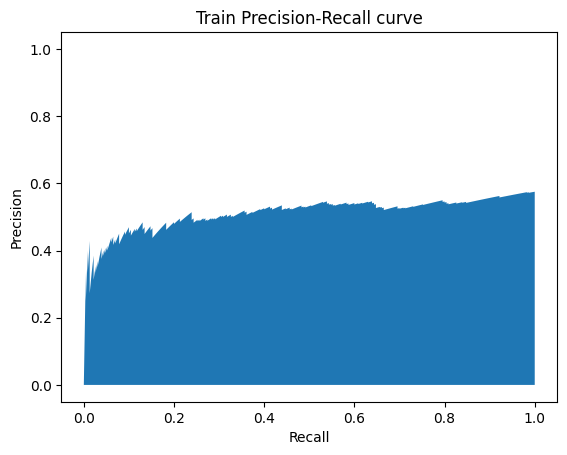

In [23]:
import matplotlib.pyplot as plt
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")